In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [51]:
T = 25
xc = 4
xmax = 10
d = [0, 0.004, 0.02]
f = [1.0, 0.4, 0.6]
c = [1, 1, 1]
p = [0, 3, 5]

# Init matrices
sMat = pd.DataFrame(index=range(xmax,-1,-1), columns=range(T),dtype = float)
iMat = pd.DataFrame(index=range(xmax,-1,-1), columns=range(T), dtype =  int)

# Starting Probabilities at t = T
sMat.loc[xmax:xc+1,T-1] = 1.0
sMat.loc[xc:0, T-1] = 0.0
iMat[T-1] = None  



In [47]:
def calcSurvival(x, time, d, f, c, p, xc):
    smax = 0.0
    ch = 0
    if x > xc:
        for i in range(0, 3, 1):
            survFeast = (x-c[i]+p[i])
            if survFeast > xmax:
                survFeast = xmax
            elif survFeast <= 0:
                survFeast = 0
            survStarve = (x-c[i])
            if survStarve > xmax:
                survStarve = xmax
            elif survStarve <= 0:
                survStarve = 0
            s = ((1-d[i])*(f[i])*(sMat.loc[survFeast,time+1]))-((1-d[i])*(1-f[i])*(sMat.loc[survStarve,time+1]))
            if smax < s:
                smax = s
                ch = i + 1
    return smax, ch  

In [52]:
for i in range(T-2,-1,-1):
    for j in range(xmax,-1, -1):
        smax, ch = calcSurvival(j, i, d, f, c, p, xc)
        sMat.loc[j,i] = smax
        iMat.loc[j,i] = ch

In [54]:
#sMat

In [34]:

import seaborn as sns

<Axes: >

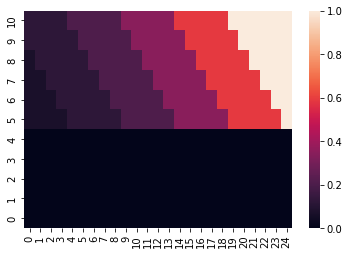

In [55]:
sns.heatmap(sMat)

# Lande 1976 Function For Simulating Evolution with A Static Optimum Fitness

In [72]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_evolution(pop_size, num_generations, heritability, mut_rate, mean_fitness, sd_fitness, theta, init_mean=0.0):
    # Initialize population
    pop = np.random.normal(loc=init_mean, scale=1.0, size=pop_size)

    # Simulate evolution
    mean_trait = np.zeros(num_generations)
    for gen in range(num_generations):
        # Calculate fitness
        fitness = np.random.normal(loc=mean_fitness, scale=sd_fitness, size=pop_size)
        # Calculate breeding values
        BV = heritability * (pop - theta)
        # Add mutational effects
        mut_effect = np.random.normal(loc=0.0, scale=mut_rate, size=pop_size)
        BV += mut_effect
        # Calculate offspring values
        offspring = np.random.normal(loc=BV + theta, scale=np.sqrt(1-heritability), size=pop_size)
        # Calculate new population
        pop = offspring
        # Store mean trait
        mean_trait[gen] = np.mean(pop)
    
    return mean_trait





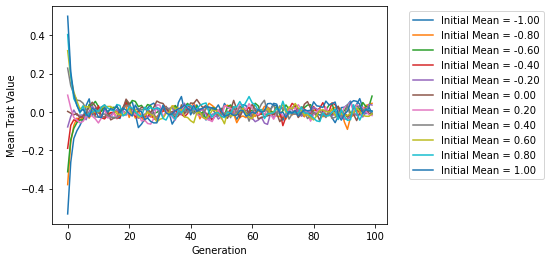

In [75]:
# Simulate evolution with multiple starting means

mean_traits = []
for init_mean in init_mean_range:
    mean_trait = simulate_evolution(pop_size, num_generations, heritability, mut_rate, mean_fitness, sd_fitness, theta, init_mean)
    mean_traits.append(mean_trait)

# Plot mean trait over time for each starting mean
for i, init_mean in enumerate(init_mean_range):
    plt.plot(mean_traits[i], label=f"Initial Mean = {init_mean:.2f}")
plt.xlabel('Generation')
plt.ylabel('Mean Trait Value')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()